In [1]:
import pandas as pd
import tensorflow as tf
from Utils import *

## CNN-TD-LSTM Model

#### Import data (ESC-10)

In [2]:
# import the .pkl file
df = pd.read_pickle("esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 155)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.851576, 0.36829507, 0.39175826,...",0,1,True


#### Define the initialization model function

In [3]:
def init_model():
    # Re build the model using the functional API
    inputs = tf.keras.Input(shape = (mel_shape[0], mel_shape[1]))
    x = tf.keras.layers.Reshape((mel_shape[0], mel_shape[1], 1))(inputs)
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(56, 2, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3))(x)
    x = tf.keras.layers.Conv2D(48, 2, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((4, 4))(x)
    # Permute the last with the second to fit the dimensions of the TimeDistributed layer and the LSTM layer
    x = tf.keras.layers.Permute((3, 2, 1))(x)
    lstm = tf.keras.layers.LSTM(56, dropout=0.1)
    x = tf.keras.layers.TimeDistributed(lstm)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(192, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(10, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [4]:
model = init_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 155)]        0         
                                                                 
 reshape (Reshape)           (None, 128, 155, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 153, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 76, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 75, 56)        14392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 25, 56)       0         
 2D)                                                         

#### Training and results

Fold 1/5
Pre-training accuracy: 6.25 %
Epoch 1/12
40/40 [==============================] - 19s 423ms/step - loss: 1.7454 - accuracy: 0.3578 - val_loss: 1.2790 - val_accuracy: 0.5500
Epoch 2/12
40/40 [==============================] - 16s 396ms/step - loss: 1.0988 - accuracy: 0.6039 - val_loss: 1.0206 - val_accuracy: 0.7000
Epoch 3/12
40/40 [==============================] - 16s 399ms/step - loss: 0.7999 - accuracy: 0.7086 - val_loss: 0.9865 - val_accuracy: 0.6875
Epoch 4/12
40/40 [==============================] - 16s 390ms/step - loss: 0.5930 - accuracy: 0.7914 - val_loss: 0.9179 - val_accuracy: 0.6625
Epoch 5/12
40/40 [==============================] - 16s 389ms/step - loss: 0.4741 - accuracy: 0.8336 - val_loss: 0.8969 - val_accuracy: 0.7375
Epoch 6/12
40/40 [==============================] - 15s 385ms/step - loss: 0.3616 - accuracy: 0.8727 - val_loss: 1.1243 - val_accuracy: 0.6875
Epoch 7/12
40/40 [==============================] - 15s 385ms/step - loss: 0.3015 - accuracy: 0.8984 - 

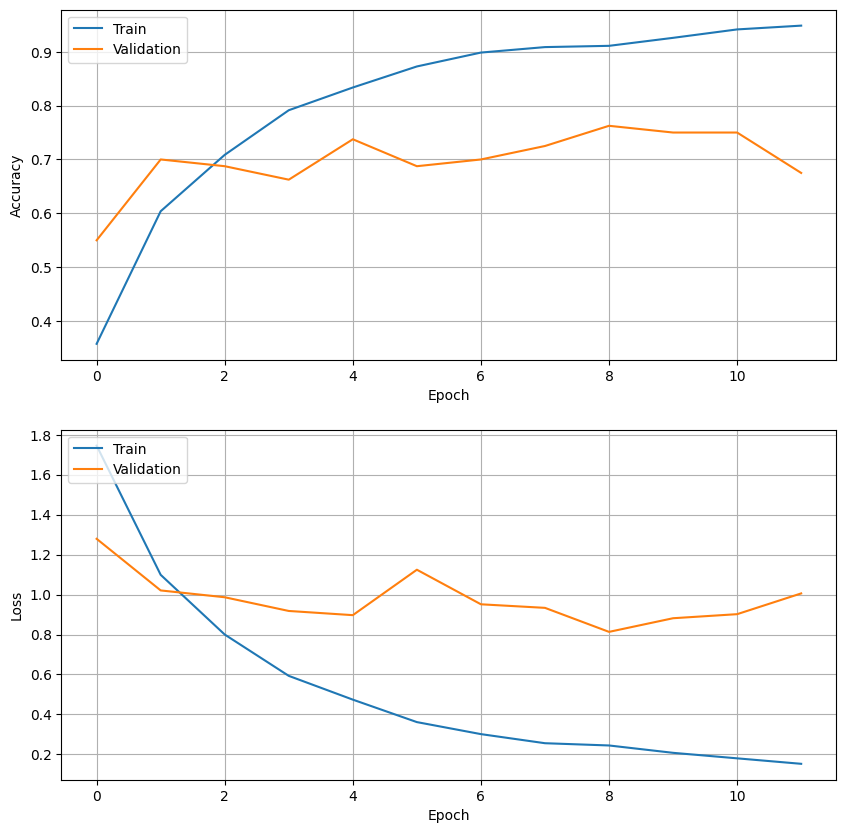

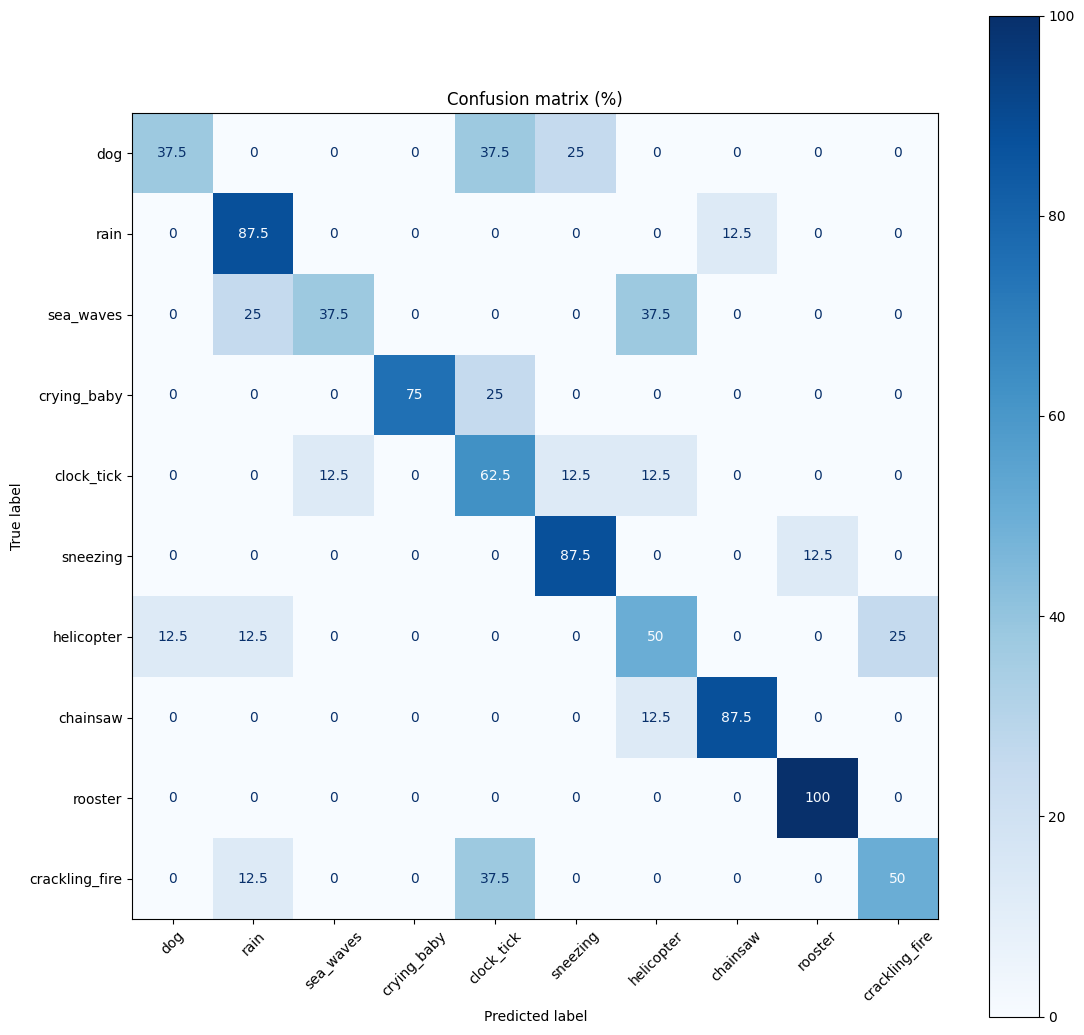

Fold 2/5
Pre-training accuracy: 3.750000149011612 %
Epoch 1/12
40/40 [==============================] - 18s 385ms/step - loss: 1.6685 - accuracy: 0.3758 - val_loss: 1.3137 - val_accuracy: 0.5000
Epoch 2/12
40/40 [==============================] - 15s 381ms/step - loss: 1.0780 - accuracy: 0.6320 - val_loss: 0.9496 - val_accuracy: 0.5875
Epoch 3/12
40/40 [==============================] - 15s 381ms/step - loss: 0.7770 - accuracy: 0.7211 - val_loss: 0.8405 - val_accuracy: 0.6500
Epoch 4/12
40/40 [==============================] - 15s 381ms/step - loss: 0.6150 - accuracy: 0.7766 - val_loss: 0.6950 - val_accuracy: 0.7375
Epoch 5/12
40/40 [==============================] - 17s 432ms/step - loss: 0.4991 - accuracy: 0.8219 - val_loss: 0.5981 - val_accuracy: 0.7500
Epoch 6/12
40/40 [==============================] - 17s 422ms/step - loss: 0.4178 - accuracy: 0.8484 - val_loss: 0.5327 - val_accuracy: 0.7750
Epoch 7/12
40/40 [==============================] - 15s 371ms/step - loss: 0.3584 - accura

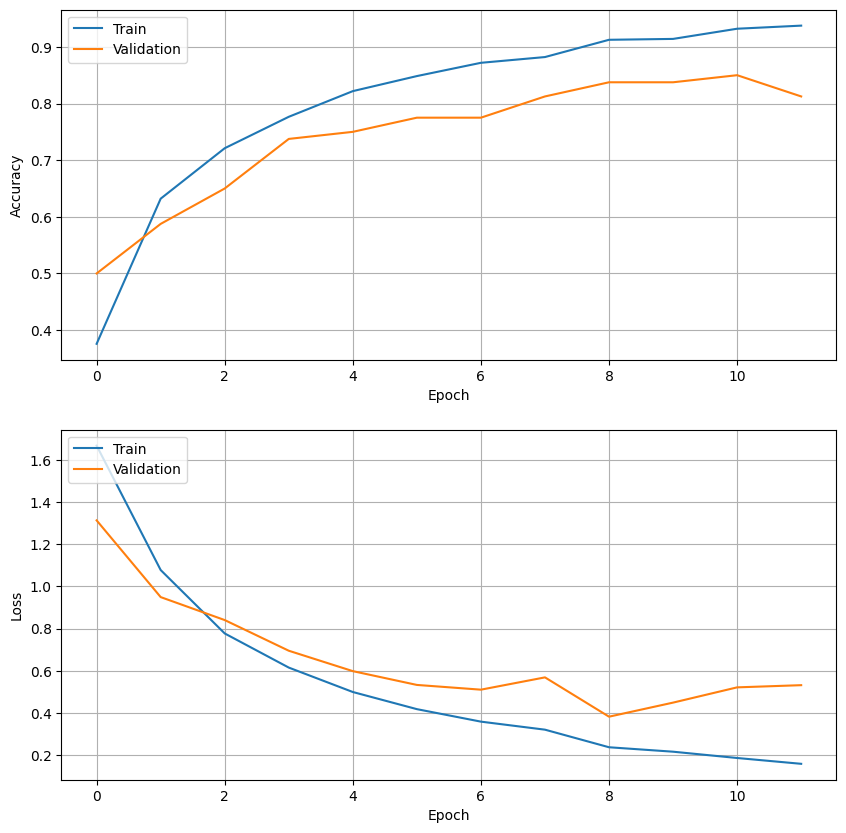

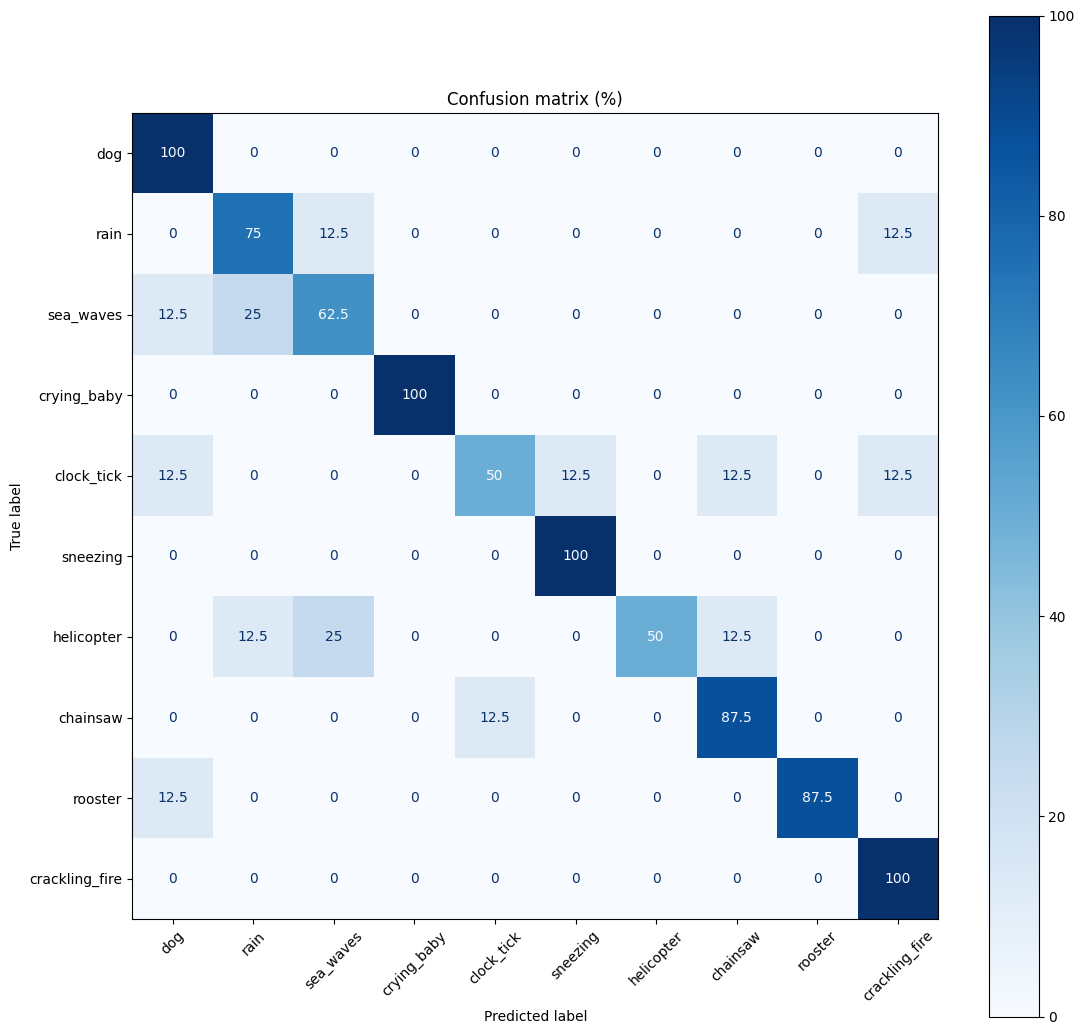

Fold 3/5
Pre-training accuracy: 3.750000149011612 %
Epoch 1/12
40/40 [==============================] - 20s 437ms/step - loss: 1.6933 - accuracy: 0.3586 - val_loss: 1.4411 - val_accuracy: 0.4250
Epoch 2/12
40/40 [==============================] - 18s 450ms/step - loss: 1.0482 - accuracy: 0.6227 - val_loss: 1.1194 - val_accuracy: 0.6250
Epoch 3/12
40/40 [==============================] - 16s 400ms/step - loss: 0.7367 - accuracy: 0.7437 - val_loss: 0.9795 - val_accuracy: 0.6500
Epoch 4/12
40/40 [==============================] - 17s 422ms/step - loss: 0.6019 - accuracy: 0.7914 - val_loss: 0.8327 - val_accuracy: 0.7375
Epoch 5/12
40/40 [==============================] - 16s 399ms/step - loss: 0.4650 - accuracy: 0.8352 - val_loss: 0.8251 - val_accuracy: 0.7375
Epoch 6/12
40/40 [==============================] - 16s 401ms/step - loss: 0.3332 - accuracy: 0.8844 - val_loss: 0.7781 - val_accuracy: 0.7750
Epoch 7/12
40/40 [==============================] - 16s 405ms/step - loss: 0.2876 - accura

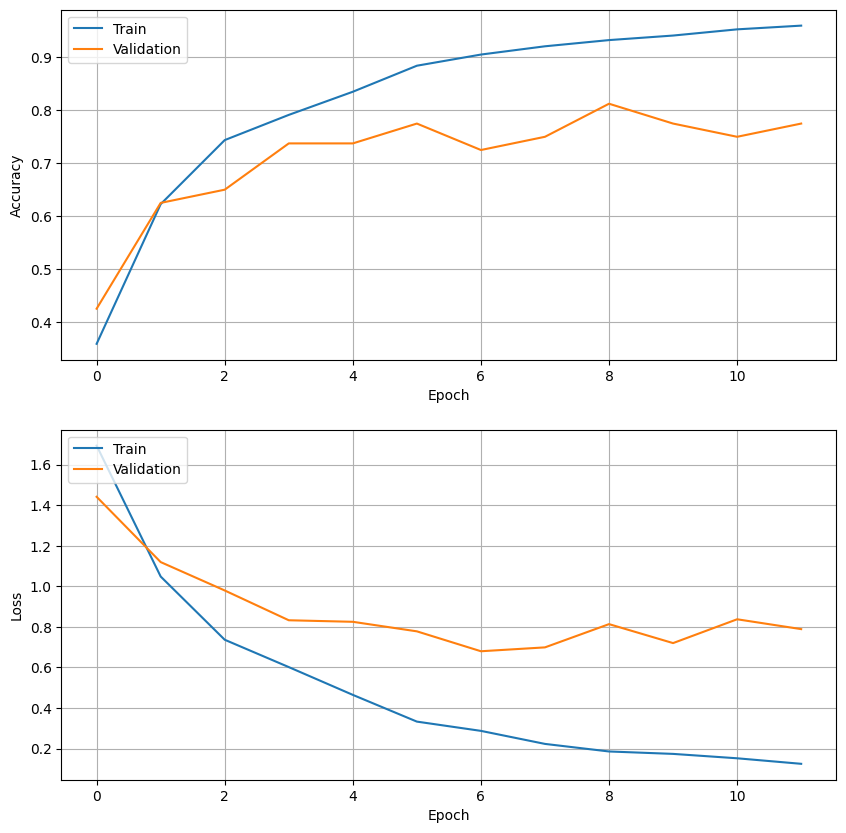

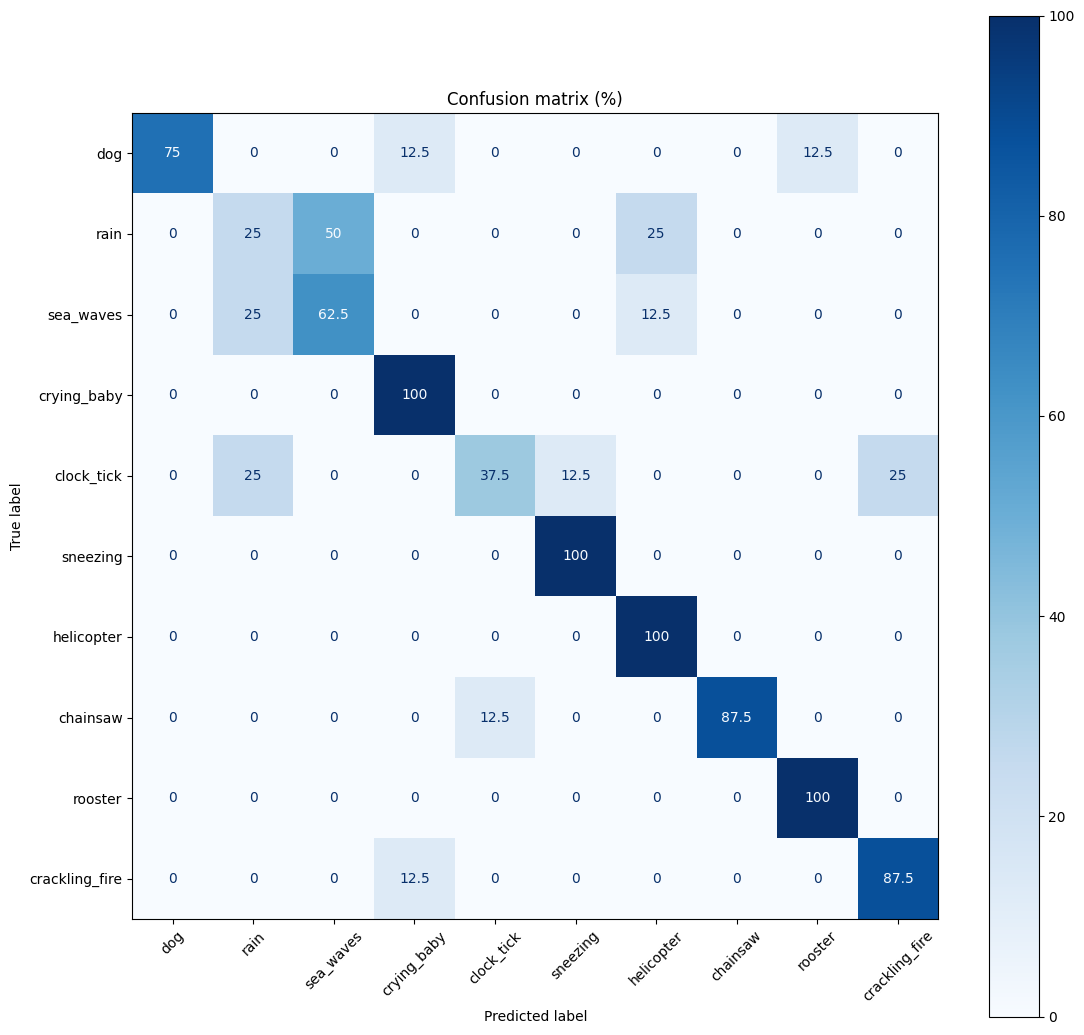

Fold 4/5
Pre-training accuracy: 10.000000149011612 %
Epoch 1/12
40/40 [==============================] - 19s 404ms/step - loss: 1.7272 - accuracy: 0.3664 - val_loss: 1.2392 - val_accuracy: 0.5625
Epoch 2/12
40/40 [==============================] - 17s 413ms/step - loss: 1.1173 - accuracy: 0.5922 - val_loss: 0.9242 - val_accuracy: 0.6500
Epoch 3/12
40/40 [==============================] - 16s 407ms/step - loss: 0.8493 - accuracy: 0.6781 - val_loss: 0.7313 - val_accuracy: 0.7375
Epoch 4/12
40/40 [==============================] - 16s 408ms/step - loss: 0.6607 - accuracy: 0.7656 - val_loss: 0.6202 - val_accuracy: 0.7000
Epoch 5/12
40/40 [==============================] - 17s 431ms/step - loss: 0.5163 - accuracy: 0.8156 - val_loss: 0.6731 - val_accuracy: 0.6375
Epoch 6/12
40/40 [==============================] - 17s 426ms/step - loss: 0.4608 - accuracy: 0.8313 - val_loss: 0.5069 - val_accuracy: 0.8125
Epoch 7/12
40/40 [==============================] - 17s 435ms/step - loss: 0.3451 - accur

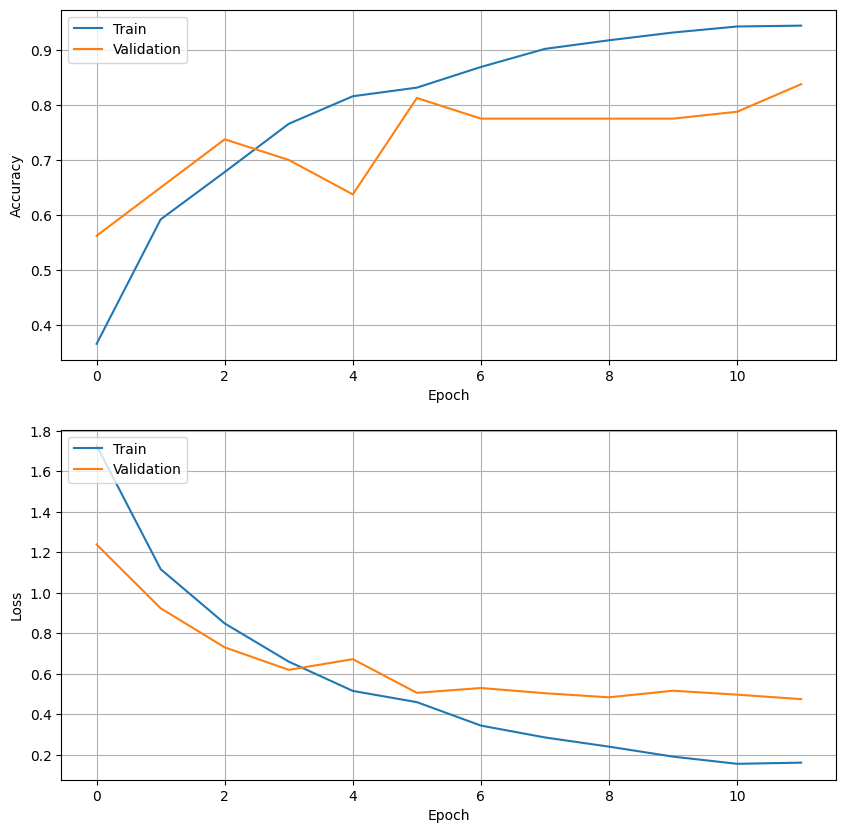

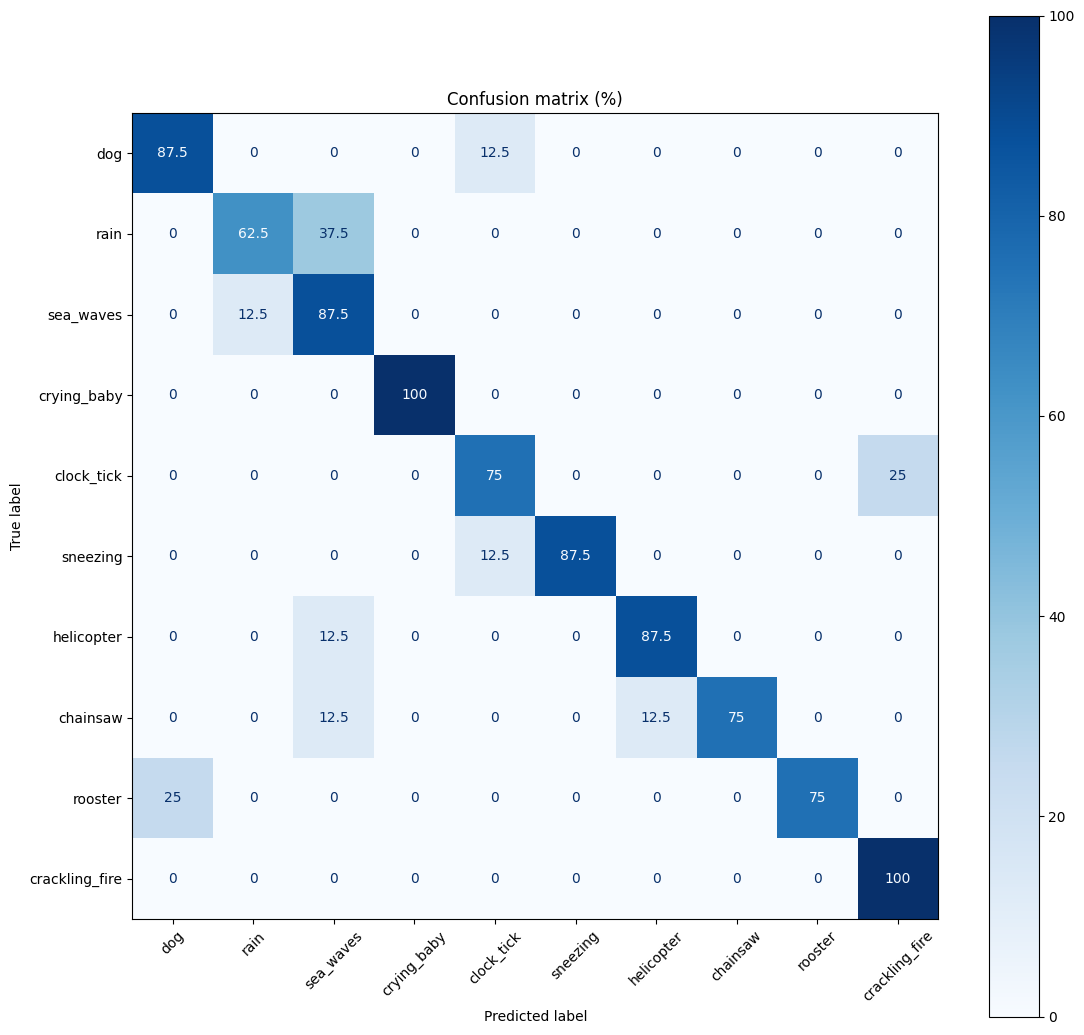

Fold 5/5
Pre-training accuracy: 10.000000149011612 %
Epoch 1/12
40/40 [==============================] - 19s 404ms/step - loss: 1.7006 - accuracy: 0.3508 - val_loss: 1.5587 - val_accuracy: 0.4625
Epoch 2/12
40/40 [==============================] - 16s 411ms/step - loss: 0.9817 - accuracy: 0.6523 - val_loss: 1.3407 - val_accuracy: 0.5875
Epoch 3/12
40/40 [==============================] - 16s 403ms/step - loss: 0.7165 - accuracy: 0.7469 - val_loss: 0.9782 - val_accuracy: 0.7125
Epoch 4/12
40/40 [==============================] - 16s 406ms/step - loss: 0.5198 - accuracy: 0.8188 - val_loss: 0.9370 - val_accuracy: 0.7125
Epoch 5/12
40/40 [==============================] - 16s 404ms/step - loss: 0.3844 - accuracy: 0.8641 - val_loss: 0.9340 - val_accuracy: 0.7375
Epoch 6/12
40/40 [==============================] - 16s 410ms/step - loss: 0.3070 - accuracy: 0.8852 - val_loss: 0.9820 - val_accuracy: 0.7250
Epoch 7/12
40/40 [==============================] - 19s 471ms/step - loss: 0.2588 - accur

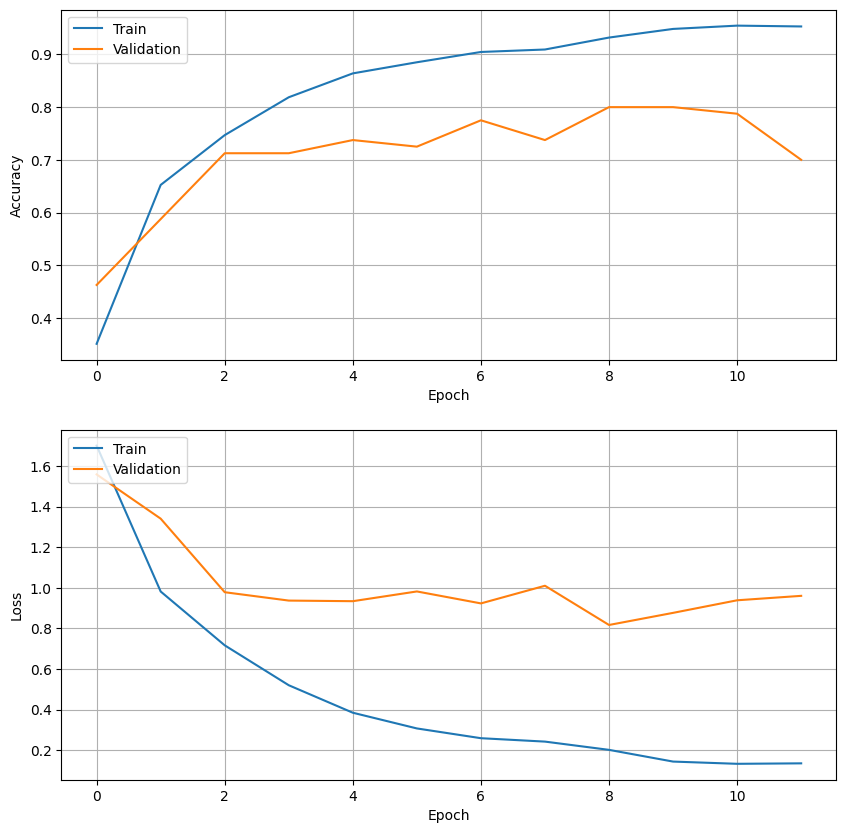

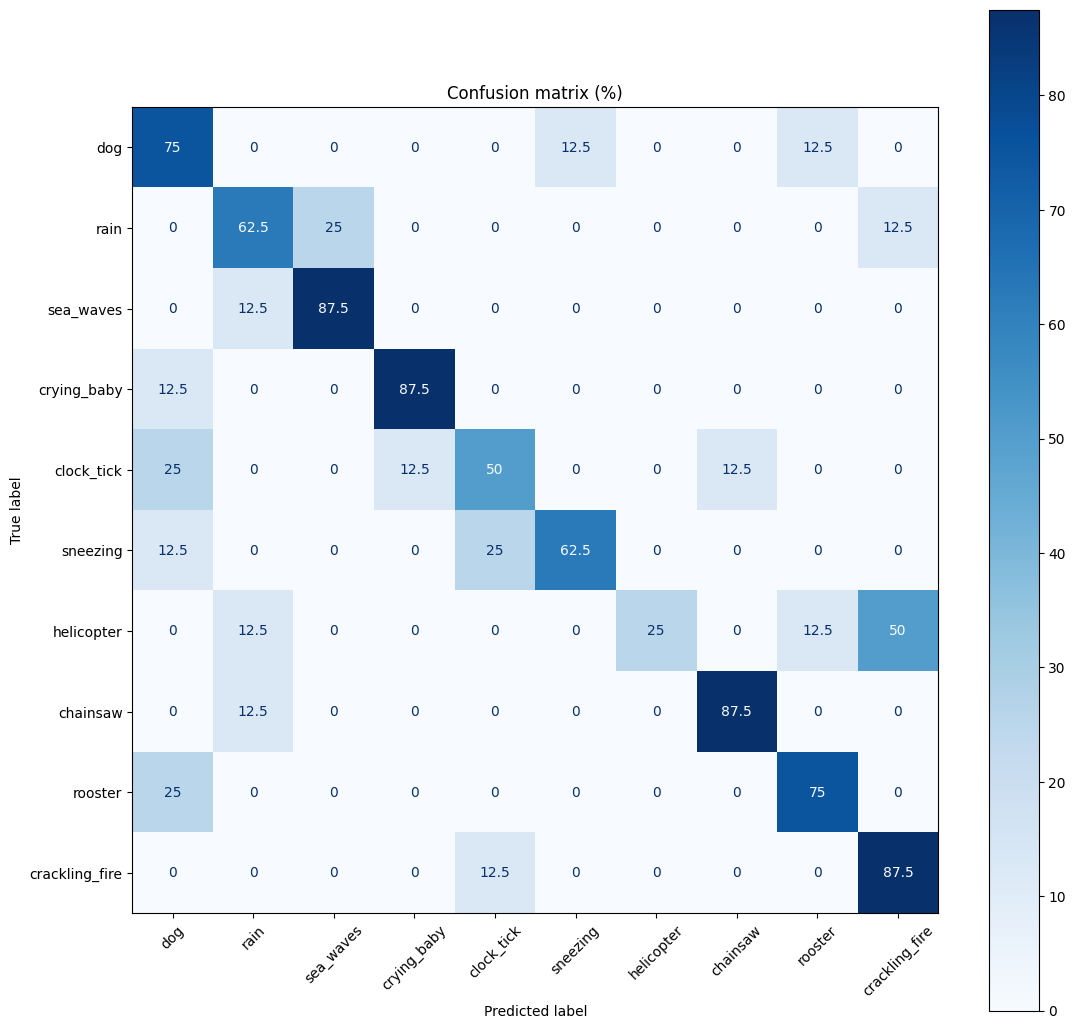

Average results:

Average accuracy: 0.95 ± 0.01
Average validation accuracy: 0.76 ± 0.06
Average loss: 0.15 ± 0.01
Average validation loss: 0.75 ± 0.22
Average training time: 196.62 ± 4.37 s

Plotting average results:



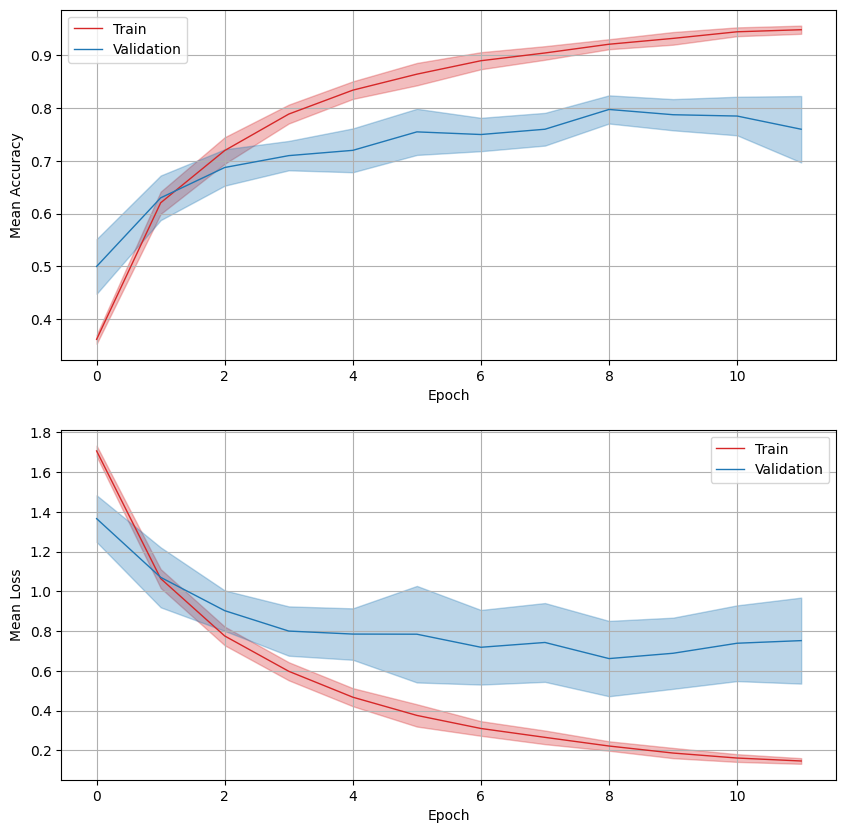

Average confusion matrix:



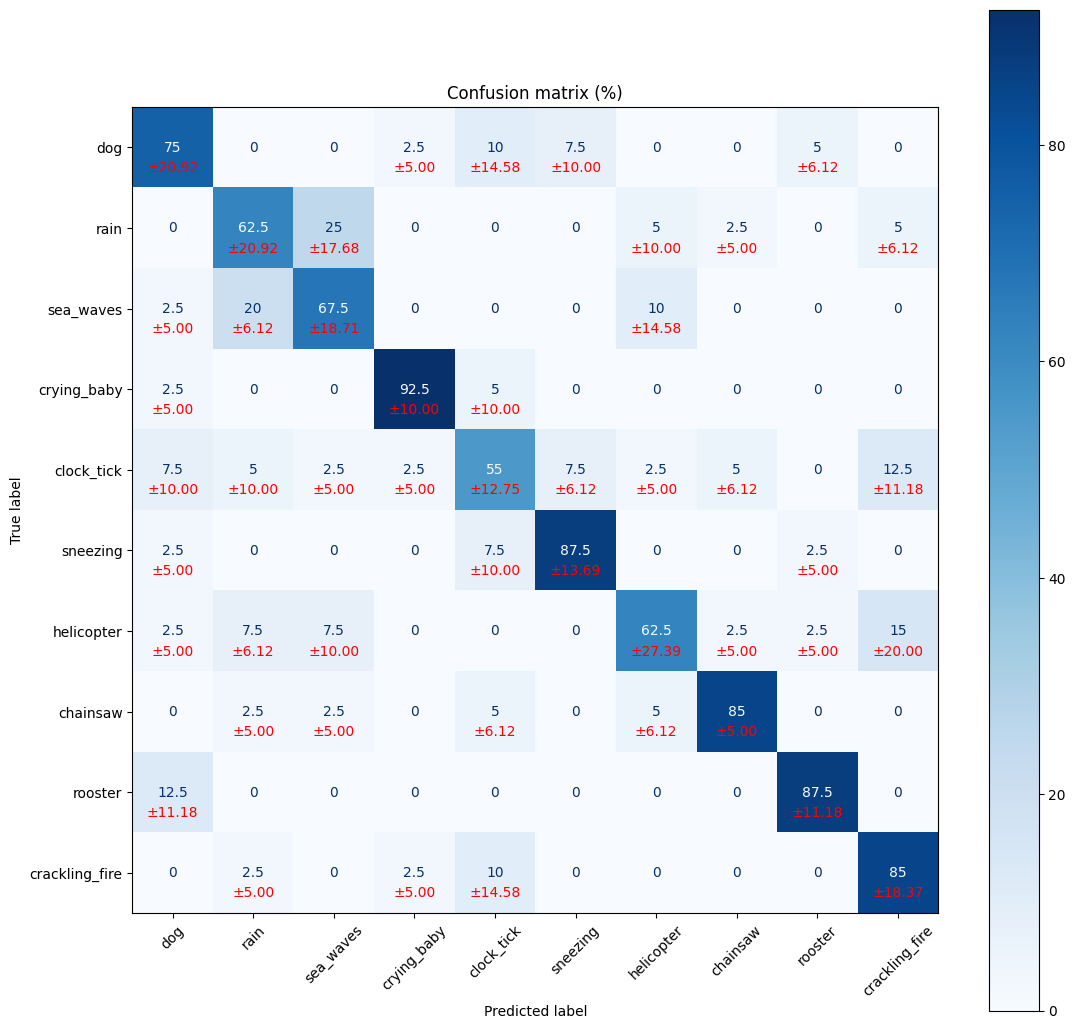

In [5]:
x_dim = (mel_shape[0], mel_shape[1])
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=12, num_batch_size=32, verbose=1)